# Part 1: Clean data

## 1.1: Clean agricultural_production_data(FAO)

In [4]:
from pydoc import describe

import pandas as pd
import os

In [10]:
data_folder = '../../data/raw/cross-national study/Agricultural Production_FAO'
df = pd.read_csv(f"{data_folder}/Agricultural Production_FAO/Production_Crops_Livestock_E_All_Data_NOFLAG.csv")
df.head(2)

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Y1961,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,ha,0.0,...,13703.0,14676.0,19481.0,19793.0,20053.0,29203.0,22134.0,36862.0,36462.0,37000.0
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5412,Yield,kg/ha,NaN,...,1999.6,1652.1,1685.9,1378.8,1716.1,1308.3,1775.9,1743.2,1742.0,1810.8


In [16]:
target_countries = ["Japan", "Germany", "Spain", "Italy"]
df = df[df["Area"].isin(target_countries)]
df = df[df["Element"] == "Production"]
df = df[[col for col in df.columns if "Code" not in col]]
df = df.reset_index(drop=True)

df.head(10)

,Area,Item,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
0,Germany,Apples,Production,t,851000.0,2059000.0,2216000.0,1346000.0,1424000.0,1702000.0,...,1115900.00,973462.00,1032913.00,596666.00,1198520.0,991450.0,1023320.0,1004630.0,1070980.0,941210.0
1,Germany,Apricots,Production,t,2900.0,2000.0,4198.0,3100.0,1751.0,1588.0,...,219.53,232.14,228.66,226.78,NaN,NaN,NaN,NaN,NaN,NaN
2,Germany,Asparagus,Production,t,16300.0,16100.0,18700.0,21200.0,16000.0,22493.0,...,114090.00,113613.30,120014.00,130881.00,133020.0,130560.0,117560.0,119270.0,110300.0,111900.0
3,Germany,Avocados,Production,t,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,Germany,Bananas,Production,t,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
5,Germany,Barley,Production,t,3669020.0,4908212.0,4759281.0,5411377.0,5015922.0,5394619.0,...,11562800.00,11629900.00,10730500.00,10853400.00,9583600.0,11591500.0,10769200.0,10411100.0,11207100.0,10999900.0
6,Germany,"Beans, dry",Production,t,12693.0,15787.0,16938.0,10626.0,8656.0,8466.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Germany,"Beer of barley, malted",Production,t,6895700.0,7335100.0,7684300.0,8332300.0,8652000.0,8968300.0,...,8723136.00,8721339.00,8677578.00,8480625.00,8656824.0,8040566.0,8702700.0,8544300.0,8783200.0,NaN
8,Germany,Blueberries,Production,t,NaN,NaN,NaN,NaN,NaN,NaN,...,12077.00,11945.00,10710.00,13805.00,12760.0,14850.0,11300.0,15640.0,15370.0,15320.0
9,Germany,"Broad beans and horse beans, dry",Production,t,80900.0,104195.0,99351.0,102804.0,113832.0,118016.0,...,87600.00,133200.00,153700.00,188800.00,160800.0,159500.0,235800.0,235900.0,249500.0,175300.0


In [17]:
year_cols = [col for col in df.columns if col.startswith("Y")]
df_long = df.melt(
    id_vars=["Area", "Item", "Element", "Unit"],   # 保留这些列不动
    value_vars=year_cols,                          # 需要展开的列（年份）
    var_name="Year",                               # 展开后的列名：年份
    value_name="Value"                             # 展开后的列名：产量
)
df_long["Year"] = df_long["Year"].str.extract(r"(\d{4})")
df_long.head(10)

,Area,Item,Element,Unit,Year,Value
0,Germany,Apples,Production,t,1961,851000.0
1,Germany,Apricots,Production,t,1961,2900.0
2,Germany,Asparagus,Production,t,1961,16300.0
3,Germany,Avocados,Production,t,1961,NaN
4,Germany,Bananas,Production,t,1961,NaN
5,Germany,Barley,Production,t,1961,3669020.0
6,Germany,"Beans, dry",Production,t,1961,12693.0
7,Germany,"Beer of barley, malted",Production,t,1961,6895700.0
8,Germany,Blueberries,Production,t,1961,NaN
9,Germany,"Broad beans and horse beans, dry",Production,t,1961,80900.0


## 1.2: Clean climate_data (OWID)







In [2]:
import pandas as pd
import os

data_folder = '../../data/raw/cross-national study/climate_data _OWID/climate_data _OWID/monthly-average-surface-temperatures-by-year'
temp_df = pd.read_csv(f"{data_folder}/monthly-average-surface-temperatures-by-year.csv")
temp_df.head(2)

,Entity,Code,Year,2025,2024,2023,2022,2021,2020,2019,...,1959,1958,1956,1954,1952,1957,1955,1953,1951,1950
0,Afghanistan,AFG,1,-1.812812,3.300064,-4.335608,-0.322859,-1.001608,-2.560545,0.585145,...,-2.333814,0.576404,-3.351925,-2.276692,-2.812619,-4.239172,-2.191683,-2.915993,-3.126317,-2.655707
1,Afghanistan,AFG,2,1.728558,1.024550,4.187041,2.165870,5.688000,2.880046,0.068664,...,-1.545529,0.264962,0.455350,-0.304205,0.798226,-2.747945,1.999074,1.983414,-2.642800,-3.996040


In [3]:
target_countries = ["Japan", "Germany", "Spain", "Italy"]
temp_df = temp_df[temp_df["Entity"].isin(target_countries)]

temp_df.head(5)

,Entity,Code,Year,2025,2024,2023,2022,2021,2020,2019,...,1959,1958,1956,1954,1952,1957,1955,1953,1951,1950
924,Germany,DEU,1,2.019176,1.539955,3.626494,2.806345,0.667262,3.532432,0.722000,...,-0.116038,-0.421879,0.217203,-3.254344,0.187323,0.129954,-1.864191,-0.881841,1.430572,-0.994760
925,Germany,DEU,2,1.537303,6.646778,3.282579,4.532697,1.817147,5.343970,4.112094,...,-0.148791,1.968528,-9.977055,-3.696044,-0.054818,3.935786,-1.961799,-0.060099,1.972033,3.061355
926,Germany,DEU,3,6.076815,7.552429,5.780346,5.241647,4.865992,5.380081,6.704629,...,6.338524,-0.275784,2.971595,4.462193,2.629372,6.436402,0.381635,4.989328,2.388841,4.984322
927,Germany,DEU,4,10.581038,10.149447,7.586209,7.828894,6.135363,10.560516,9.785563,...,9.586491,5.257608,5.255665,5.867049,10.389263,7.499947,6.898544,9.158531,7.406067,6.919163
928,Germany,DEU,5,NaN,15.140265,13.187914,14.566760,10.796934,12.054605,11.118146,...,12.792577,13.483042,12.558229,12.237287,12.350787,9.850443,10.368385,13.297674,11.544678,13.779639


In [4]:
non_year_cols = ["Entity", "Code", "Year"]
year_cols = [col for col in temp_df.columns if col not in non_year_cols]
temp_long = temp_df.melt(
    id_vars="Entity",
    value_vars=year_cols,
    var_name="Year",
    value_name="Temperature (°C)"
)
temp_long["Year"] = temp_long["Year"].astype(int)

temp_long.head(5)

,Entity,Year,Temperature (°C)
0,Germany,2025,2.019176
1,Germany,2025,1.537303
2,Germany,2025,6.076815
3,Germany,2025,10.581038
4,Germany,2025,NaN


In [43]:
precip_df = pd.read_csv("average-precipitation-per-year.csv")
precip_df = precip_df[precip_df["Entity"].isin(target_countries)]
precip_df = precip_df.rename(columns={"Annual precipitation": "Precipitation (mm)"})
precip_df = precip_df[["Entity", "Year", "Precipitation (mm)"]]

precip_df.head(5)

,Entity,Year,Precipitation (mm)
5950,Germany,1940,776.32135
5951,Germany,1941,846.49840
5952,Germany,1942,639.55230
5953,Germany,1943,643.28120
5954,Germany,1944,784.10260


In [44]:
merged = pd.merge(temp_long, precip_df, on=["Entity", "Year"])
merged = merged.rename(columns={"Entity": "Country"})
merged = merged[["Country", "Year", "Temperature (°C)", "Precipitation (mm)"]]
merged = merged.sort_values(by=["Country", "Year"])

merged.head(5)

,Country,Year,Temperature (°C),Precipitation (mm)
3552,Germany,1950,-0.994760,790.8431
3553,Germany,1950,3.061355,790.8431
3554,Germany,1950,4.984322,790.8431
3555,Germany,1950,6.919163,790.8431
3556,Germany,1950,13.779639,790.8431


In [ ]:
merged.to_csv("climate_data.csv", index=False)

## 1.3: Clean control_variables (global_macro_data)



In [45]:
from global_macro_data import gmd
import pandas as pd

countries = ["JPN", "DEU", "ESP", "ITA"]

variables = [
    "rGDP_pc", "nGDP", "pop", "urban", "infl",
    "unemp", "govexp", "govrev", "lifeexp", "open"
]

df = gmd(country=countries, variables=variables)

df.rename(columns={
    "ISO3": "Country Code",
    "year": "Year",
    "rGDP_pc": "Real GDP per capita",
    "nGDP": "Nominal GDP",
    "pop": "Population",
    "urban": "Urbanization (%)",
    "infl": "Inflation (%)",
    "unemp": "Unemployment (%)",
    "govexp": "Government expenditure (%GDP)",
    "govrev": "Government revenue (%GDP)",
    "lifeexp": "Life expectancy",
    "open": "Trade openness (%GDP)"
}, inplace=True)

df = df.sort_values(by=["Country Code", "Year"])
df = df[df["Year"] >= 1960]

df.head(5)


Downloading: https://www.globalmacrodata.com/GMD_2025_03.csv
Filtered data for countries: JPN, DEU, ESP, ITA
Available variables are:
- BankingCrisis  - CA  - CA_GDP  - CPI  
- CurrencyCrisis  - HPI  - ISO3  - M0  
- M1  - M2  - M3  - M4  
- REER  - SovDebtCrisis  - USDfx  - cbrate  
- cons  - cons_GDP  - countryname  - deflator  
- exports  - exports_GDP  - finv  - finv_GDP  
- govdebt  - govdebt_GDP  - govdef  - govdef_GDP  
- govexp  - govexp_GDP  - govrev  - govrev_GDP  
- govtax  - govtax_GDP  - id  - imports  
- imports_GDP  - infl  - inv  - inv_GDP  
- ltrate  - nGDP  - pop  - rGDP  
- rGDP_USD  - rGDP_pc  - rcons  - strate  
- unemp  - year  

Selected 10 variables
Final dataset: 2411 observations of 10 variables


,Country Code,countryname,Year,Real GDP per capita,Nominal GDP,Population,Inflation (%),Unemployment (%),Government expenditure (%GDP),Government revenue (%GDP)
12110,DEU,Germany,1960,10404.326,181644.41,72.814903,1.536615,1.0,34951.934,59474.734
12111,DEU,Germany,1961,10768.331,199046.14,73.377632,2.293686,0.7,40713.309,69373.180
12112,DEU,Germany,1962,11167.556,216489.94,74.025787,2.843273,0.6,43157.031,72565.500
12113,DEU,Germany,1963,11367.286,229445.28,74.714355,2.966959,0.7,46979.828,76667.648
12114,DEU,Germany,1964,12024.808,252133.55,75.318336,2.335735,0.6,50310.246,84426.820


In [ ]:
df.to_csv("four_country_control_variables.csv", index=False)

# Part 2: Merge data



In [18]:
import pandas as pd
import os

In [19]:
data_folder = '../../data/processed/cross-national study'
agri_df = pd.read_csv(f"{data_folder}/agricultural_production_data_LongPanel.csv")
agri_df.head(5)

,Area,Year,Item,Element,Unit,Value
0,Germany,1961,Apples,Production,t,851000.0
1,Germany,1961,Apricots,Production,t,2900.0
2,Germany,1961,Asparagus,Production,t,16300.0
3,Germany,1961,Avocados,Production,t,NaN
4,Germany,1961,Bananas,Production,t,NaN


In [20]:
climate_df = pd.read_csv(f"{data_folder}/climate_data.csv")
climate_df.head(5)

,Country,Year,Temperature (°C),Precipitation (mm)
0,Germany,1950,-0.994760,790.8431
1,Germany,1950,3.061355,790.8431
2,Germany,1950,4.984322,790.8431
3,Germany,1950,6.919163,790.8431
4,Germany,1950,13.779639,790.8431


In [21]:
control_df = pd.read_csv(f"{data_folder}/four_country_control_variables.csv")
control_df.head(5)

,Country Code,countryname,Year,Real GDP per capita,Nominal GDP,Population,Inflation (%),Unemployment (%),Government expenditure (%GDP),Government revenue (%GDP)
0,DEU,Germany,1960,10404.326,181644.41,72.814903,1.536615,1.0,34951.934,59474.734
1,DEU,Germany,1961,10768.331,199046.14,73.377632,2.293686,0.7,40713.309,69373.180
2,DEU,Germany,1962,11167.556,216489.94,74.025787,2.843273,0.6,43157.031,72565.500
3,DEU,Germany,1963,11367.286,229445.28,74.714355,2.966959,0.7,46979.828,76667.648
4,DEU,Germany,1964,12024.808,252133.55,75.318336,2.335735,0.6,50310.246,84426.820


In [24]:
iso3_to_name = {
    "JPN": "Japan",
    "DEU": "Germany",
    "ESP": "Spain",
    "ITA": "Italy"
}
control_df["Country"] = control_df["Country Code"].map(iso3_to_name)
climate_control_df = pd.merge(climate_df, control_df, on=["Country", "Year"], how="inner")
agri_df = agri_df.rename(columns={"Area": "Country"})
agri_df["Year"] = agri_df["Year"].astype(int)
final_df = pd.merge(agri_df, climate_control_df, on=["Country", "Year"], how="left")
final_df = final_df.drop(columns=["Country Code", "countryname"], errors="ignore")
final_df.to_csv("merged_agri_climate_control.csv", index=False)
final_df.head(5)

,Country,Year,Item,Element,Unit,Value,Temperature (°C),Precipitation (mm),Real GDP per capita,Nominal GDP,Population,Inflation (%),Unemployment (%),Government expenditure (%GDP),Government revenue (%GDP)
0,Germany,1961,Apples,Production,t,851000.0,-0.725017,882.0518,10768.331,199046.14,73.377632,2.293686,0.7,40713.309,69373.18
1,Germany,1961,Apples,Production,t,851000.0,4.590780,882.0518,10768.331,199046.14,73.377632,2.293686,0.7,40713.309,69373.18
2,Germany,1961,Apples,Production,t,851000.0,6.488963,882.0518,10768.331,199046.14,73.377632,2.293686,0.7,40713.309,69373.18
3,Germany,1961,Apples,Production,t,851000.0,10.891521,882.0518,10768.331,199046.14,73.377632,2.293686,0.7,40713.309,69373.18
4,Germany,1961,Apples,Production,t,851000.0,10.594926,882.0518,10768.331,199046.14,73.377632,2.293686,0.7,40713.309,69373.18


# Part 3: Descriptive statistics

In [25]:
import pandas as pd
import os
data_folder = '../../data/processed/cross-national study'
df = pd.read_csv(f"{data_folder}/merged_agri_climate_control.csv")
df.describe()

,Year,Value,Temperature (°C),Precipitation (mm),Real GDP per capita,Nominal GDP,Population,Inflation (%),Unemployment (%),Government expenditure (%GDP),Government revenue (%GDP)
count,557172.000000,4.771920e+05,557172.000000,557172.000000,5.571720e+05,5.571720e+05,557172.000000,557172.000000,557172.000000,5.552160e+05,5.552160e+05
mean,1992.000000,1.298983e+06,11.866928,1058.656339,6.819116e+05,8.188544e+07,71.110554,4.610005,7.045456,2.983479e+07,2.590089e+07
std,18.184259,4.096815e+06,7.042116,427.923744,1.346915e+06,1.775186e+08,29.773281,4.829335,5.430681,6.684036e+07,5.761763e+07
min,1961.000000,0.000000e+00,-7.269345,471.727170,6.236144e+03,5.174030e+03,30.739250,-1.352839,0.500000,4.882930e+02,8.891562e+02
25%,1976.000000,7.547000e+03,6.138618,749.545100,1.669605e+04,3.200004e+05,46.773056,1.606529,2.767088,8.328064e+04,1.031457e+05
50%,1992.000000,7.653900e+04,11.520030,919.361400,2.421639e+04,1.119010e+06,59.133175,3.053744,5.439179,4.938150e+05,4.440370e+05
75%,2008.000000,5.453000e+05,17.890762,1204.268200,3.447310e+04,3.129374e+06,82.534180,5.910339,10.050232,1.334629e+06,1.363672e+06
max,2023.000000,5.201040e+07,26.357111,2345.827600,4.443114e+06,5.918812e+08,128.070010,24.538044,26.100000,2.538245e+08,2.190696e+08


In [28]:
missing_rate = df.isnull().mean().sort_values(ascending=False).to_frame(name="Missing Rate")
missing_rate

,Missing Rate
Value,0.143546
Government revenue (%GDP),0.003511
Government expenditure (%GDP),0.003511
Item,0.000000
Element,0.000000
Year,0.000000
Country,0.000000
Temperature (°C),0.000000
Unit,0.000000
Precipitation (mm),0.000000


In [29]:
yearly_counts = df["Year"].value_counts().sort_index()
yearly_counts

Year
1961    8844
1962    8844
1963    8844
1964    8844
1965    8844
        ... 
2019    8844
2020    8844
2021    8844
2022    8844
2023    8844
Name: count, Length: 63, dtype: int64

# Part 4: Visualization




In [ ]:
import pandas as pd
import os
data_folder = '../../data/processed/cross-national study'
df = pd.read_csv(f"{data_folder}/merged_agri_climate_control.csv")

## 4.1 Time series

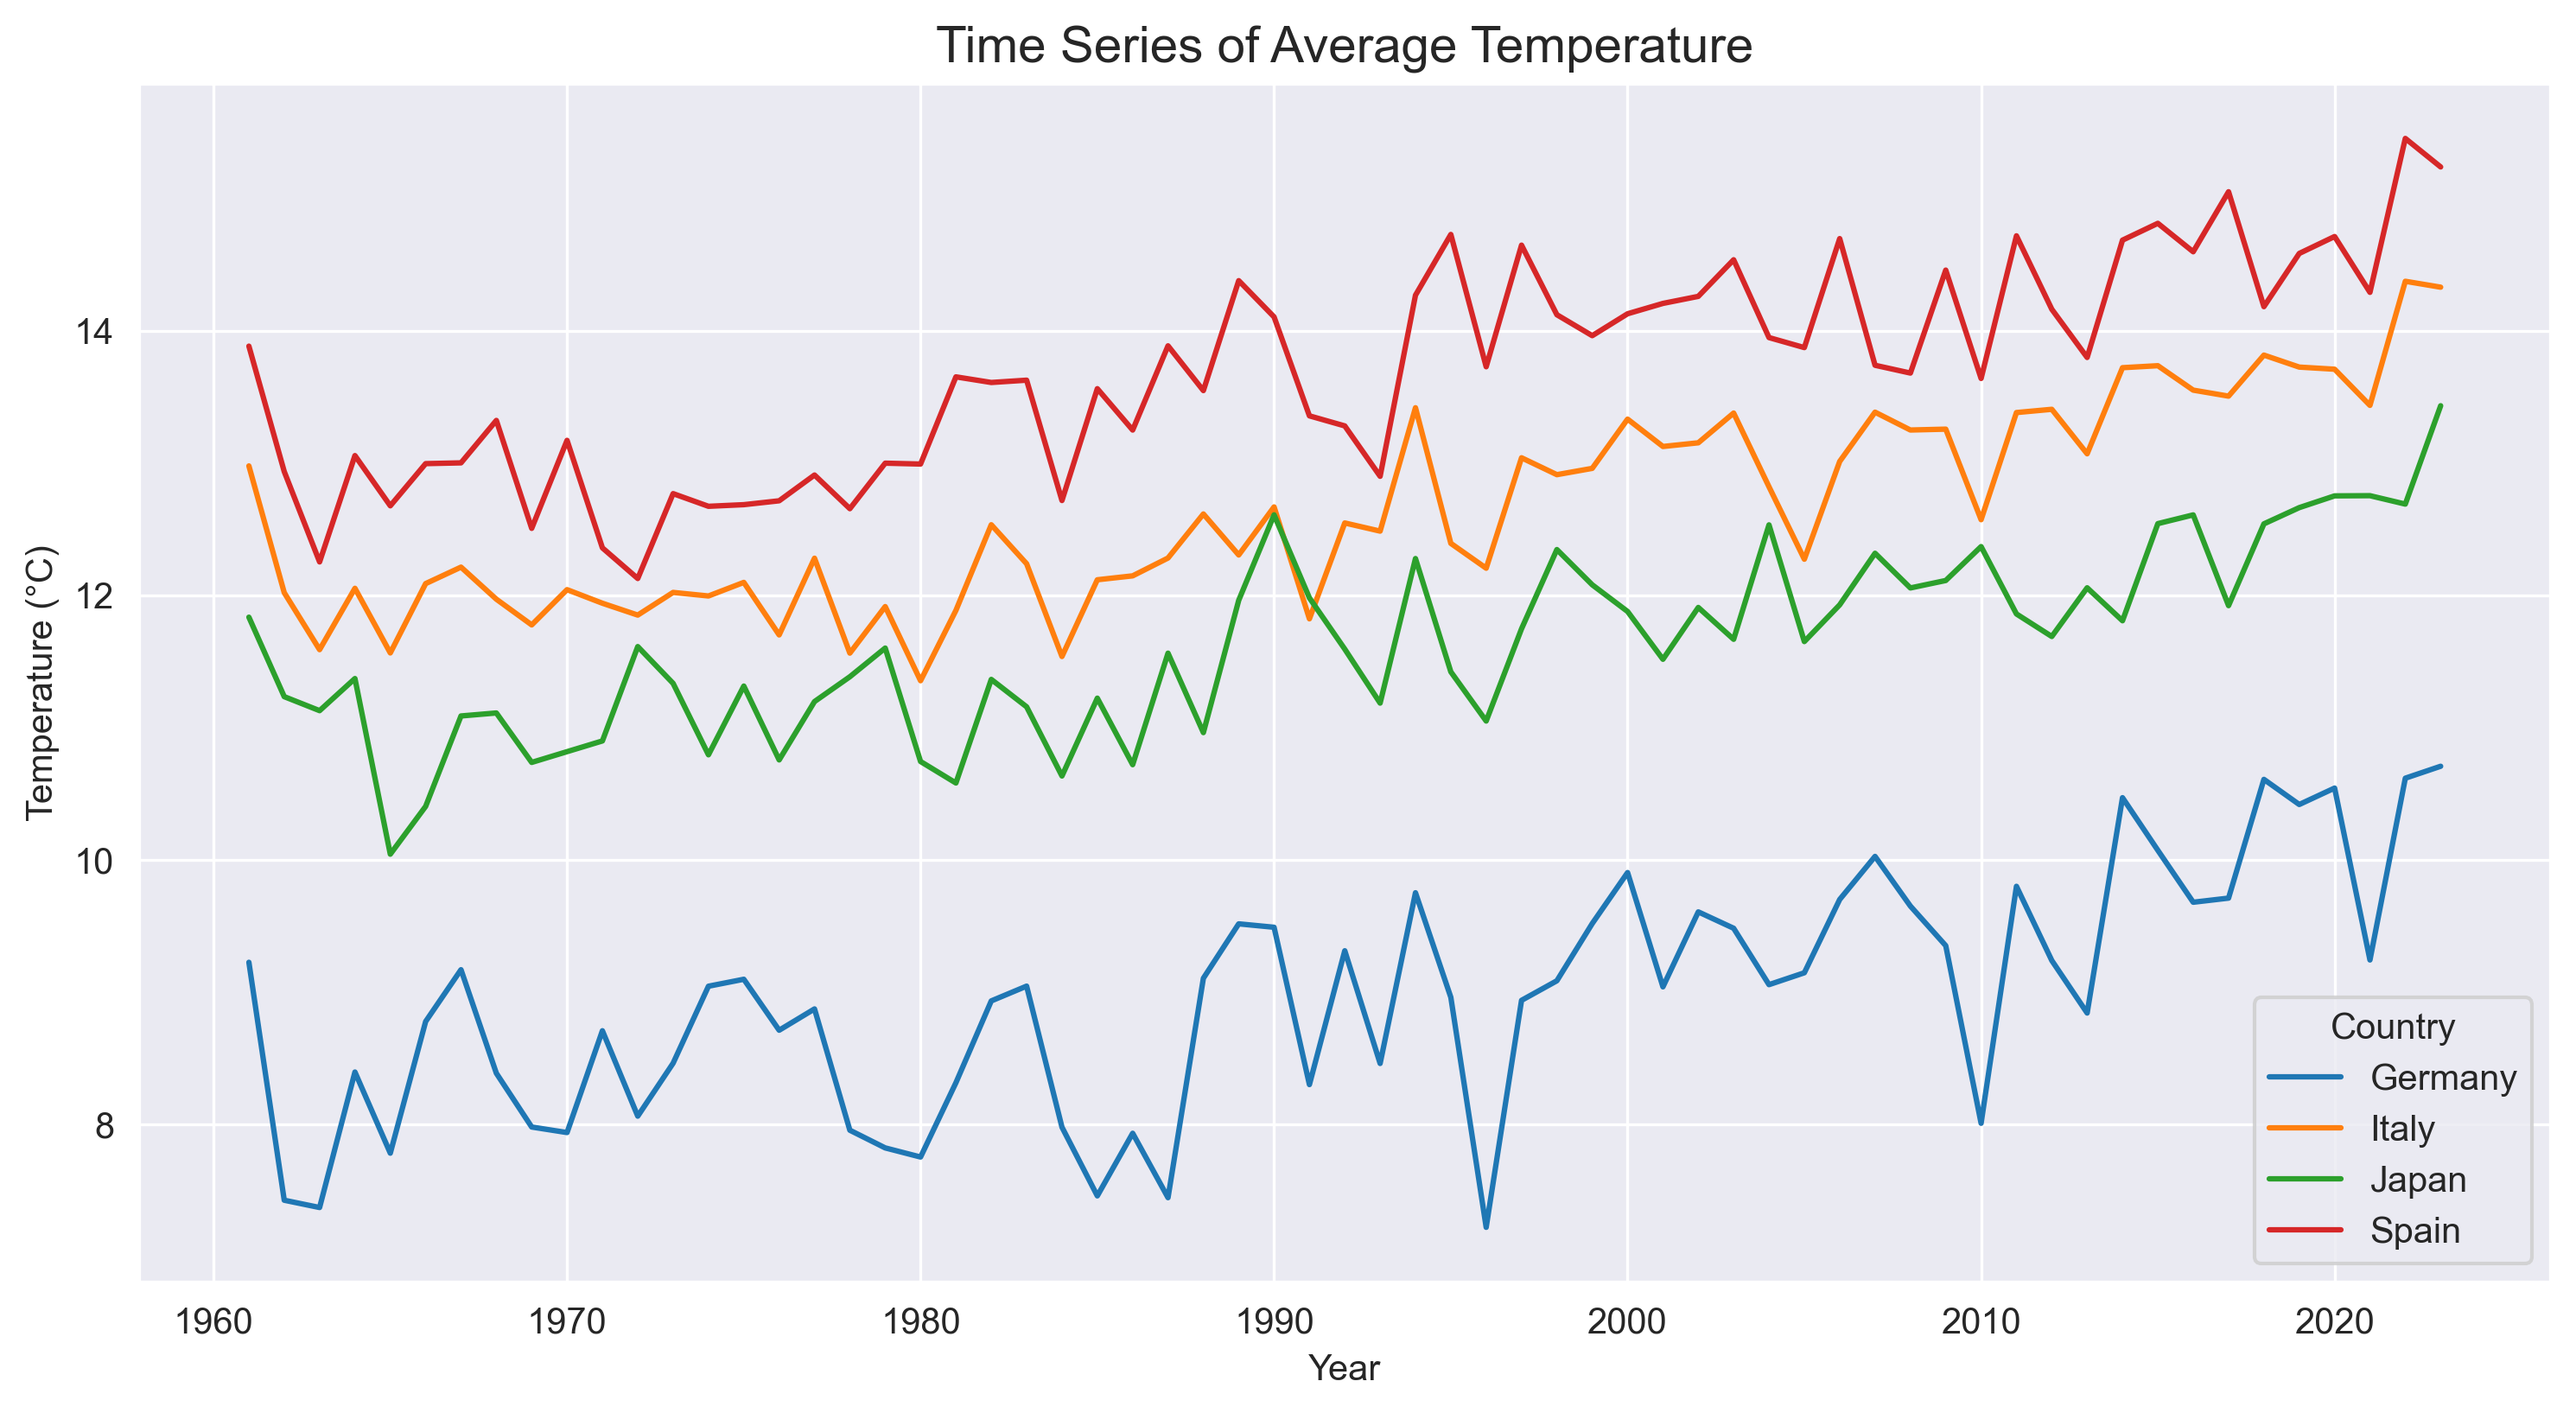

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6), dpi=300)
sns.lineplot(data=df, x="Year", y="Temperature (°C)", hue="Country", errorbar=None)
plt.title("Time Series of Average Temperature", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(True)

plt.savefig("temperature_trend_highres.png", dpi=300)
plt.show()

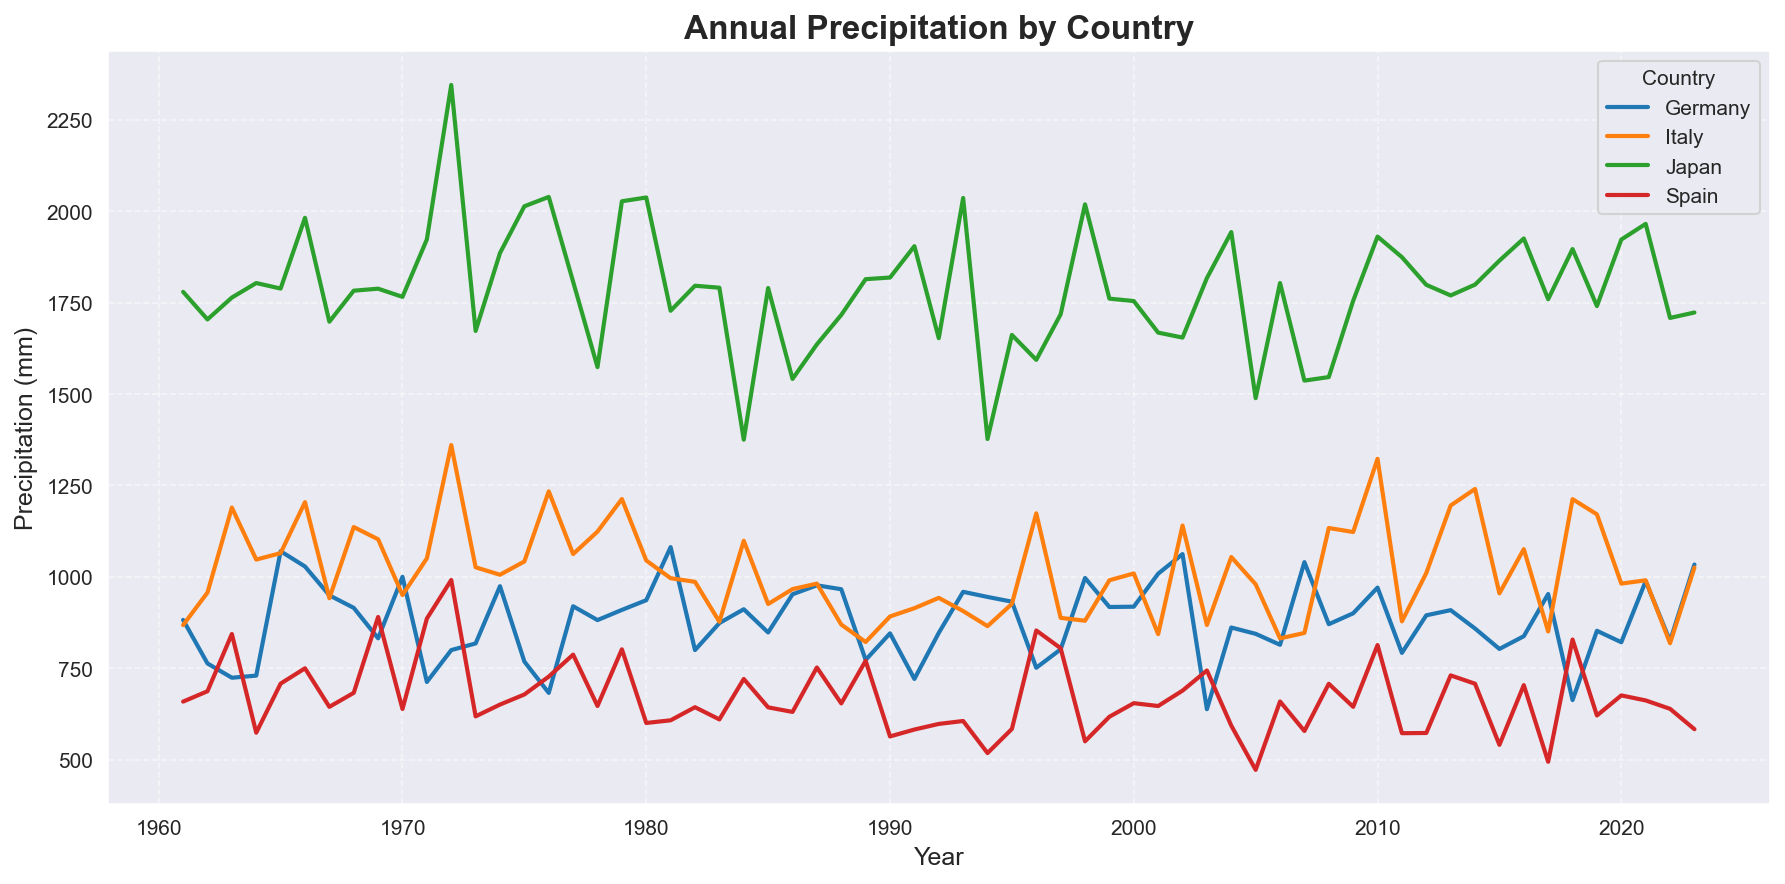

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6), dpi=150)  # 高分辨率

sns.lineplot(
    data=df,
    x="Year",
    y="Precipitation (mm)",
    hue="Country",
    errorbar=None,
    linewidth=2
)

plt.title("Annual Precipitation by Country", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Precipitation (mm)", fontsize=12)

plt.legend(title="Country", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Annual Precipitation by Country.png", dpi=300)
plt.show()

## 4.2 Bar plot

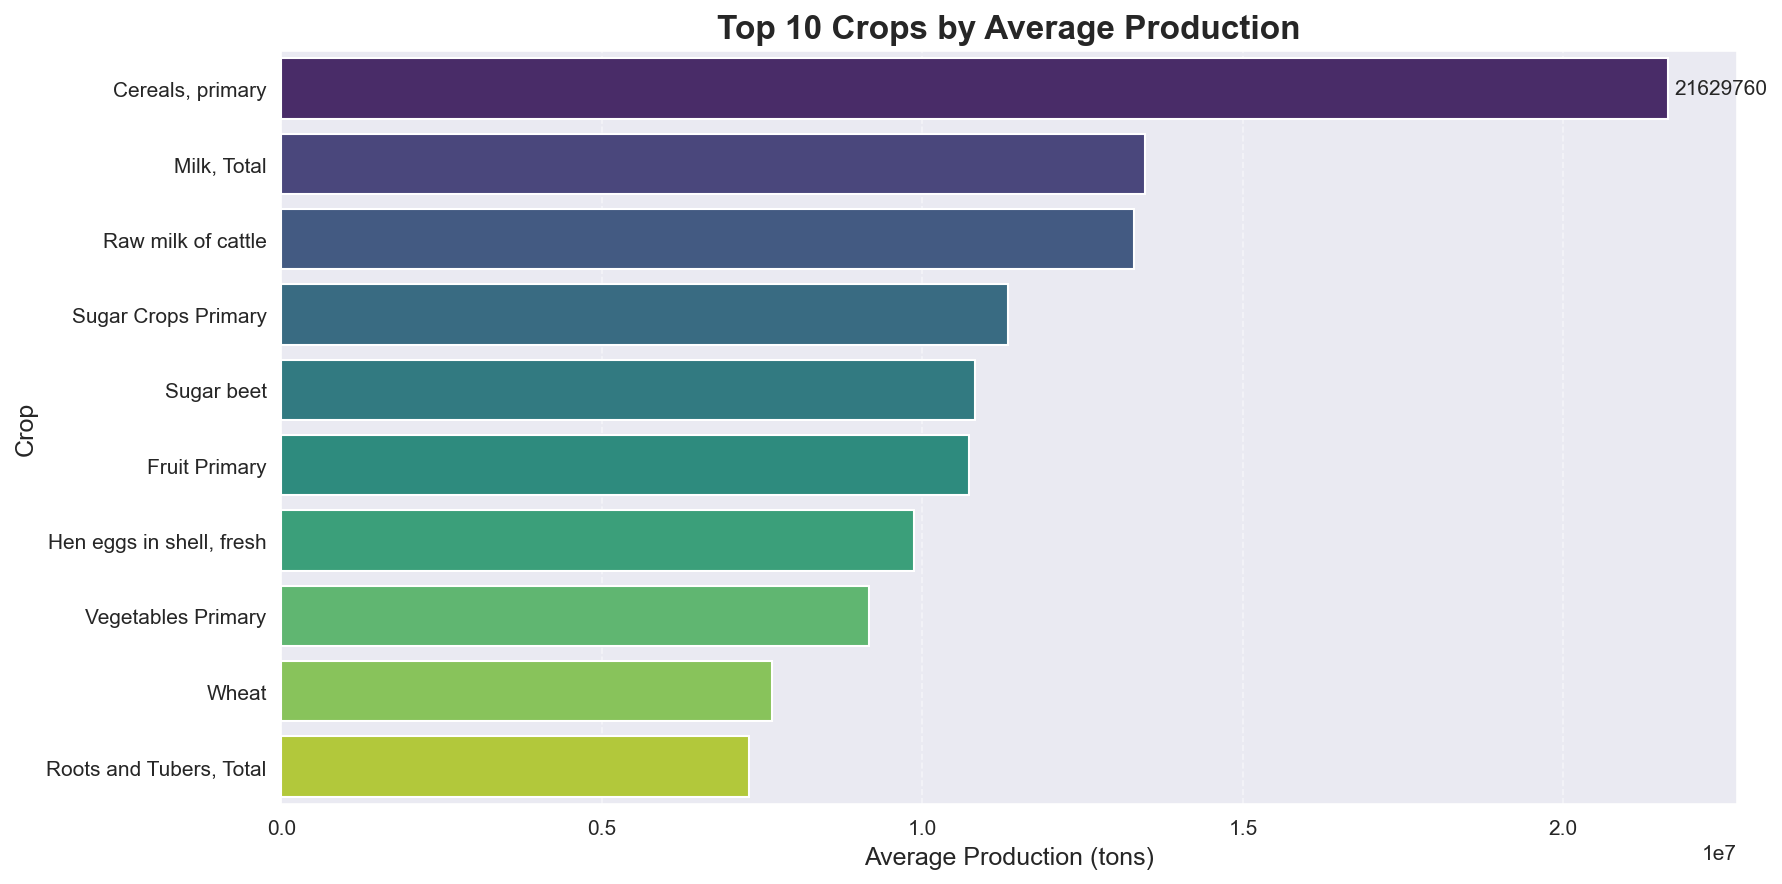

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

crop_avg = df.groupby("Item")["Value"].mean().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12, 6), dpi=150)
ax = sns.barplot(data=crop_avg, x="Value", y="Item", hue="Item", dodge=False, palette="viridis", legend=False)
ax.bar_label(container=ax.containers[0], fmt="%.0f", padding=3, fontsize=10)

plt.title("Top 10 Crops by Average Production", fontsize=16, weight="bold")
plt.xlabel("Average Production (tons)", fontsize=12)
plt.ylabel("Crop", fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Top 10 Crops by Average Production.png", dpi=300)

plt.show()

# Part 5：Dashboard



In [4]:
import subprocess
from pathlib import Path
dashboard_path = Path().resolve().parents[1] / "src" / "cross-national study" / "5_dashboard.py"
subprocess.Popen([
    "streamlit", "run", str(dashboard_path),
    "--server.headless", "true",
    "--server.port", "8501"
])
'http://localhost:8501'

'http://localhost:8501'

# Part 6: Regression Analysis







In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

data_folder = '../../data/processed/cross-national study'
climate_df = pd.read_csv(f"{data_folder}/climate_data.csv")
agri_df = pd.read_csv(f"{data_folder}/agricultural_production_data_LongPanel.csv")
control_df = pd.read_csv(f"{data_folder}/four_country_control_variables.csv")

## 6.1: Log-transform Selected Variables

In [8]:
# (1) Climate cross-national study: Calculate average annual temperature by country and year
climate_avg = climate_df.groupby(['Country', 'Year'], as_index=False)[
    ['Temperature (°C)', 'Precipitation (mm)']
].mean()

climate_avg.rename(columns={
    'Temperature (°C)': 'Avg_Temperature',
    'Precipitation (mm)': 'Avg_Precipitation'
}, inplace=True)


# (2) Filter for rows where Element = 'Production' and aggregate total production
agri_prod = agri_df[agri_df['Element'] == 'Production']
agri_total = agri_prod.groupby(['Area', 'Year'], as_index=False)['Value'].sum()
agri_total.rename(columns={'Area': 'Country', 'Value': 'Total_Production'}, inplace=True)

# (3) Control variables: Rename country column for consistency
control_df.rename(columns={'countryname': 'Country'}, inplace=True)


# Merge agricultural cross-national study with climate cross-national study
merged_df = pd.merge(agri_total, climate_avg, on=['Country', 'Year'], how='inner')
# Merge with control variables
merged_df = pd.merge(merged_df, control_df, on=['Country', 'Year'], how='inner')
# List of variables to be log-transformed
log_vars = ['Total_Production', 'Real GDP per capita', 'Nominal GDP', 'Population',
            'Government expenditure (%GDP)', 'Government revenue (%GDP)']
# Remove any rows with non-positive values before applying logarithm
for var in log_vars:
    merged_df = merged_df[merged_df[var] > 0]
# Create new columns for log-transformed variables
merged_df['Log_Total_Production'] = np.log(merged_df['Total_Production'])
merged_df['Log_GDP_per_capita'] = np.log(merged_df['Real GDP per capita'])
merged_df['Log_Nominal_GDP'] = np.log(merged_df['Nominal GDP'])
merged_df['Log_Population'] = np.log(merged_df['Population'])
merged_df['Log_Gov_Expenditure'] = np.log(merged_df['Government expenditure (%GDP)'])
merged_df['Log_Gov_Revenue'] = np.log(merged_df['Government revenue (%GDP)'])
merged_df.head(5)


,Country,Year,Total_Production,Avg_Temperature,Avg_Precipitation,Country Code,Real GDP per capita,Nominal GDP,Population,Inflation (%),Unemployment (%),Government expenditure (%GDP),Government revenue (%GDP),Log_Total_Production,Log_GDP_per_capita,Log_Nominal_GDP,Log_Population,Log_Gov_Expenditure,Log_Gov_Revenue
0,Germany,1961,2.407217e+08,9.224172,882.05180,DEU,10768.331,199046.14,73.377632,2.293686,0.7,40713.309,69373.180,19.299152,9.284365,12.201292,4.295619,10.614310,11.147256
1,Germany,1962,2.684218e+08,7.425068,762.83550,DEU,11167.556,216489.94,74.025787,2.843273,0.6,43157.031,72565.500,19.408070,9.320768,12.285299,4.304414,10.672601,11.192245
2,Germany,1963,2.852363e+08,7.369978,723.77230,DEU,11367.286,229445.28,74.714355,2.966959,0.7,46979.828,76667.648,19.468828,9.338495,12.343420,4.313672,10.757474,11.247235
3,Germany,1964,2.804109e+08,8.394399,729.53143,DEU,12024.808,252133.55,75.318336,2.335735,0.6,50310.246,84426.820,19.451767,9.394727,12.437714,4.321724,10.825964,11.343640
4,Germany,1965,2.677811e+08,7.780760,1069.96630,DEU,12547.893,275529.97,75.963692,3.242321,0.5,55678.410,92115.109,19.405680,9.437308,12.526452,4.330255,10.927348,11.430794


In [9]:
merged_df.describe()

,Year,Total_Production,Avg_Temperature,Avg_Precipitation,Real GDP per capita,Nominal GDP,Population,Inflation (%),Unemployment (%),Government expenditure (%GDP),Government revenue (%GDP),Log_Total_Production,Log_GDP_per_capita,Log_Nominal_GDP,Log_Population,Log_Gov_Expenditure,Log_Gov_Revenue
count,251.000000,2.510000e+02,251.000000,251.000000,2.510000e+02,2.510000e+02,251.000000,251.000000,251.000000,2.510000e+02,2.510000e+02,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,1991.876494,2.052482e+08,11.728636,1085.848531,7.536265e+05,9.047356e+07,73.647150,4.458301,6.765939,3.369574e+07,2.924977e+07,19.089143,11.101369,14.621687,4.214812,13.509051,13.551613
std,18.150832,6.738518e+07,1.932524,440.455481,1.395592e+06,1.841911e+08,30.218391,4.755450,5.301873,7.030833e+07,6.059719e+07,0.316011,2.170739,3.126106,0.414866,3.316152,3.185166
min,1961.000000,8.619128e+07,7.220112,471.727170,6.236144e+03,5.174030e+03,30.739250,-1.352839,0.500000,4.882930e+02,8.891562e+02,18.272080,8.738117,8.551407,3.425540,6.190916,6.790273
25%,1976.000000,1.592209e+08,10.593322,771.310240,1.710713e+04,3.743216e+05,49.442131,1.441788,2.684836,9.902989e+04,1.281137e+05,18.885803,9.747238,12.832183,3.900558,11.502628,11.760669
50%,1992.000000,1.814141e+08,12.051781,941.295100,2.487334e+04,1.222290e+06,60.789139,2.966959,5.056608,5.412005e+05,5.085960e+05,19.016293,10.121552,14.016237,4.107411,13.201545,13.139409
75%,2007.500000,2.320998e+08,13.137858,1341.660200,3.607038e+04,3.996246e+06,83.538990,5.855705,9.665976,1.959146e+06,1.859986e+06,19.261988,10.493226,15.200368,4.425309,14.487764,14.435826
max,2023.000000,3.605451e+08,15.453099,2345.827600,4.338088e+06,5.597100e+08,128.070010,24.538044,26.100000,2.538245e+08,2.190696e+08,19.703128,15.282944,20.142929,4.852577,19.352154,19.204900


## 6.2: Correlation Matrix





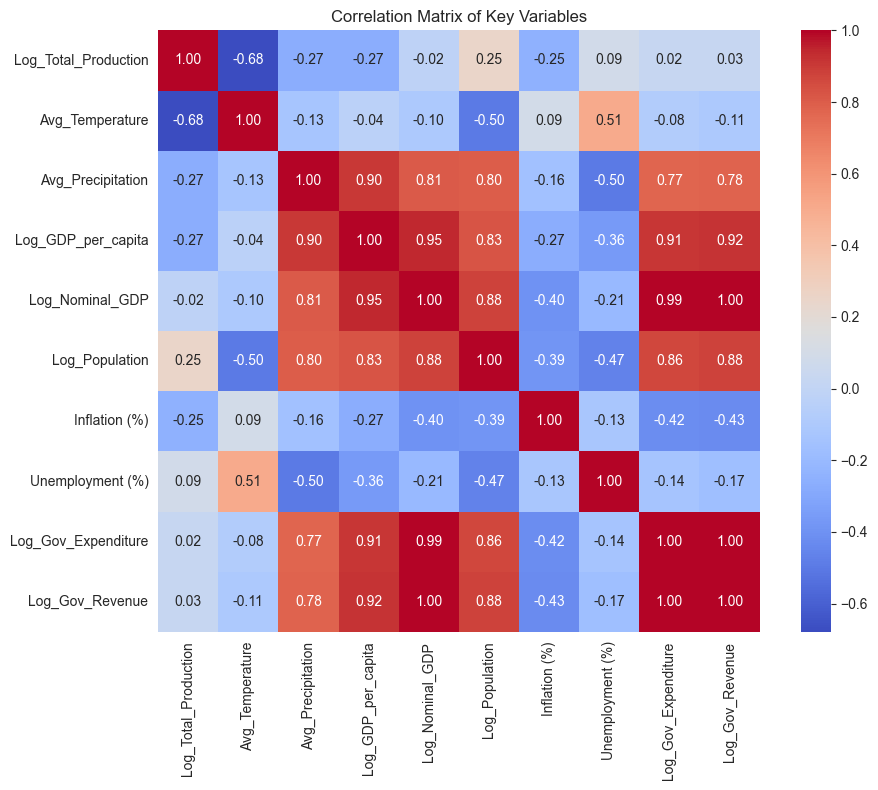

In [10]:
# Create and save a correlation heatmap for selected numeric columns
corr_matrix = merged_df[[
    'Log_Total_Production', 'Avg_Temperature','Avg_Precipitation',
    'Log_GDP_per_capita', 'Log_Nominal_GDP', 'Log_Population',
    'Inflation (%)', 'Unemployment (%)',
    'Log_Gov_Expenditure', 'Log_Gov_Revenue']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Key Variables')
plt.tight_layout()
plt.show()
plt.close()


## 6.3: OLS

In [11]:
# Define independent variables (including climate and control variables)
X = merged_df[['Avg_Temperature','Avg_Precipitation',
               'Log_GDP_per_capita', 'Log_Nominal_GDP', 'Log_Population',
               'Inflation (%)', 'Unemployment (%)',
               'Log_Gov_Expenditure', 'Log_Gov_Revenue']]

# Define dependent variable (log of total agricultural production)
y = merged_df['Log_Total_Production']

# Add a constant term to the model for the intercept
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X, missing='drop')
results = model.fit()

# Print the summary of regression results
print("\n[Regression Results]\n", results.summary())


[Regression Results]
                              OLS Regression Results                             
Dep. Variable:     Log_Total_Production   R-squared:                       0.907
Model:                              OLS   Adj. R-squared:                  0.904
Method:                   Least Squares   F-statistic:                     261.5
Date:                  Mon, 23 Jun 2025   Prob (F-statistic):          5.47e-119
Time:                          22:26:24   Log-Likelihood:                 231.73
No. Observations:                   251   AIC:                            -443.5
Df Residuals:                       241   BIC:                            -408.2
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

## 6.4: OLS Visualization

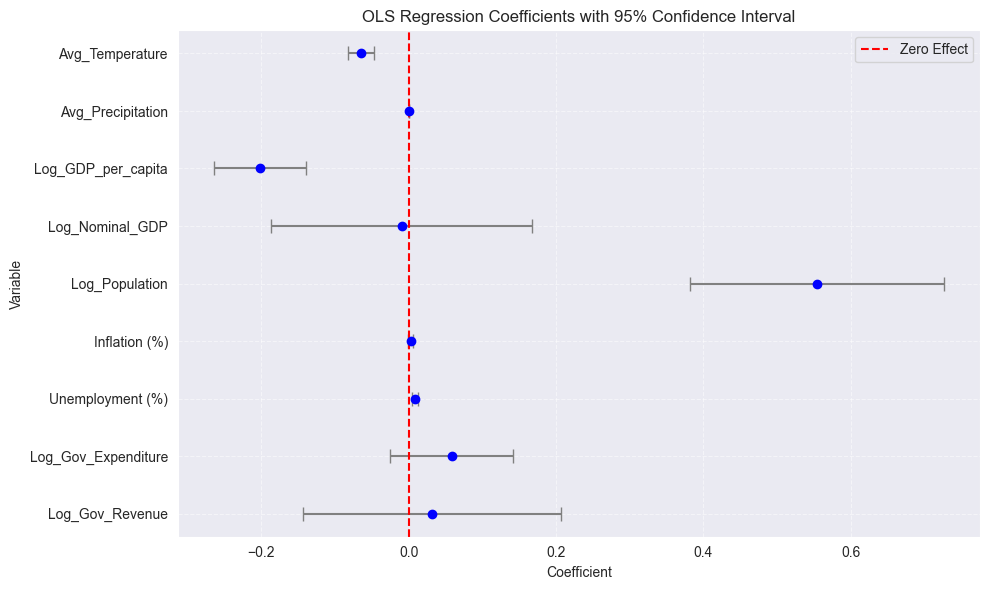

In [12]:
import matplotlib.pyplot as plt

summary_df = results.summary2().tables[1].reset_index()
summary_df.rename(columns={
    'index': 'Variable',
    'Coef.': 'Coefficient',
    '[0.025': 'Lower_CI',
    '0.975]': 'Upper_CI'
}, inplace=True)


climate_vars = ['Avg_Temperature', 'Avg_Precipitation']
other_vars = [v for v in summary_df['Variable'] if v not in climate_vars + ['const']]
final_order = climate_vars + other_vars
summary_df = summary_df[summary_df['Variable'] != 'const']
summary_df['Variable'] = pd.Categorical(summary_df['Variable'], categories=final_order[::-1], ordered=True)
summary_df = summary_df.sort_values('Variable')
summary_df['xerr_low'] = (summary_df['Coefficient'] - summary_df['Lower_CI']).abs()
summary_df['xerr_high'] = (summary_df['Upper_CI'] - summary_df['Coefficient']).abs()


plt.figure(figsize=(10, 6))
plt.errorbar(
    summary_df['Coefficient'], summary_df['Variable'],
    xerr=[summary_df['xerr_low'], summary_df['xerr_high']],
    fmt='o', color='blue', ecolor='gray', capsize=5
)

plt.axvline(x=0, color='red', linestyle='--', label='Zero Effect')
plt.title('OLS Regression Coefficients with 95% Confidence Interval')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

## 6.5: Two-Way Fixed Effects Regression


In [20]:
from linearmodels.panel import PanelOLS

merged_df = merged_df.rename(columns={
    'Inflation (%)': 'Inflation',
    'Unemployment (%)': 'Unemployment'
})

formula = (
    'Log_Total_Production ~ Avg_Temperature + Avg_Precipitation + '
    'Log_GDP_per_capita + Log_Nominal_GDP + Log_Population + '
    'Inflation + Unemployment + '
    'Log_Gov_Expenditure + Log_Gov_Revenue + '
    'EntityEffects + TimeEffects'
)
model = PanelOLS.from_formula(formula, data=merged_df)
results = model.fit(cov_type='clustered', cluster_entity=True)

print(results.summary)

                           PanelOLS Estimation Summary                            
Dep. Variable:     Log_Total_Production   R-squared:                        0.6627
Estimator:                     PanelOLS   R-squared (Between):              0.5813
No. Observations:                   251   R-squared (Within):              -3.3474
Date:                  Mon, Jun 23 2025   R-squared (Overall):              0.5805
Time:                          22:34:37   Log-likelihood                    349.52
Cov. Estimator:               Clustered                                           
                                          F-statistic:                      38.422
Entities:                             4   P-value                           0.0000
Avg Obs:                         62.750   Distribution:                   F(9,176)
Min Obs:                         62.000                                           
Max Obs:                         63.000   F-statistic (robust):         -3.625e+13
    

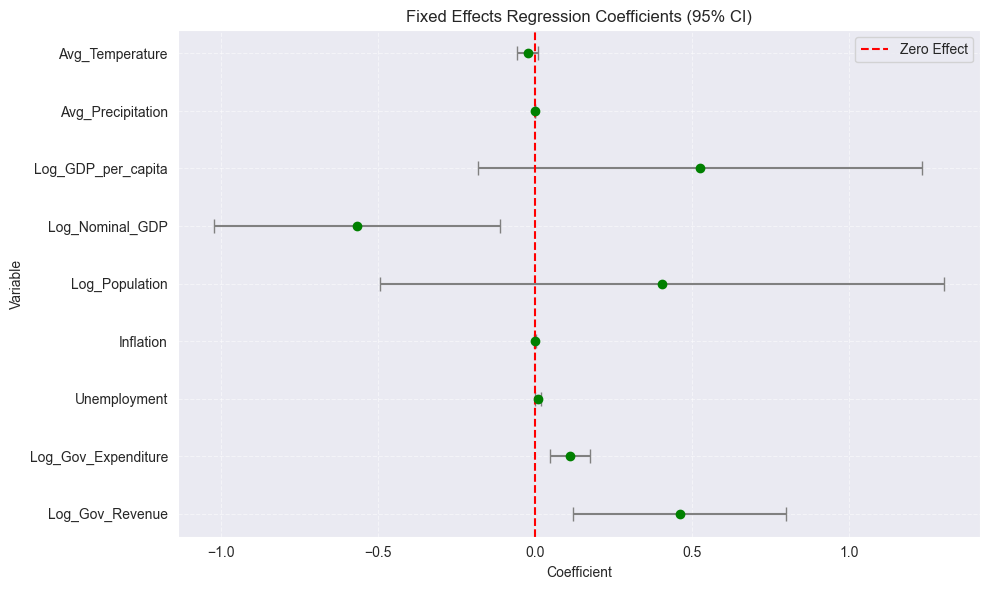

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

params = results.params
stderr = results.std_errors
df = pd.DataFrame({
    'Variable': params.index,
    'Coefficient': params.values,
    'StdErr': stderr.values
})

df = df[~df['Variable'].str.contains('Effect')]
df = df[df['Variable'] != '']
df['Lower_CI'] = df['Coefficient'] - 1.96 * df['StdErr']
df['Upper_CI'] = df['Coefficient'] + 1.96 * df['StdErr']

climate_vars = ['Avg_Temperature', 'Avg_Precipitation']
other_vars = [v for v in df['Variable'] if v not in climate_vars]
final_order = climate_vars + other_vars
df['Variable'] = pd.Categorical(df['Variable'], categories=final_order[::-1], ordered=True)
df = df.sort_values('Variable')


plt.figure(figsize=(10, 6))
plt.errorbar(
    df['Coefficient'], df['Variable'],
    xerr=[(df['Coefficient'] - df['Lower_CI']).abs(),
          (df['Upper_CI'] - df['Coefficient']).abs()],
    fmt='o', color='green', ecolor='gray', capsize=5
)

plt.axvline(x=0, color='red', linestyle='--', label='Zero Effect')
plt.title('Fixed Effects Regression Coefficients (95% CI)')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

## 7. Scraping

In [3]:
url = "https://www.env.go.jp/policy/hakusyo/r07/pdf.html"
print(f"This is the link to get the report pdf file: {url}")
print(f"The file is named as 全体版")

This is the link to get the report pdf file: https://www.env.go.jp/policy/hakusyo/r07/pdf.html
The file is named as 全体版


In [ ]:
CountVectorizer(max_features=20, # top 100 most common words
                 stop_words='english', lowercase=True, ngram_range=(1, 2))

Top words: [('地球環境の保全', 2), ('生物多様性の保全及び持続可能な利用に関する取組', 2), ('循環型社会の形成', 2), ('水環境', 2), ('土壌環境', 2), ('海洋環境', 2), ('大気環境の保全', 2), ('再生に関', 2), ('する取組', 2), ('包括的な化学物質対策に関する取組', 2)]


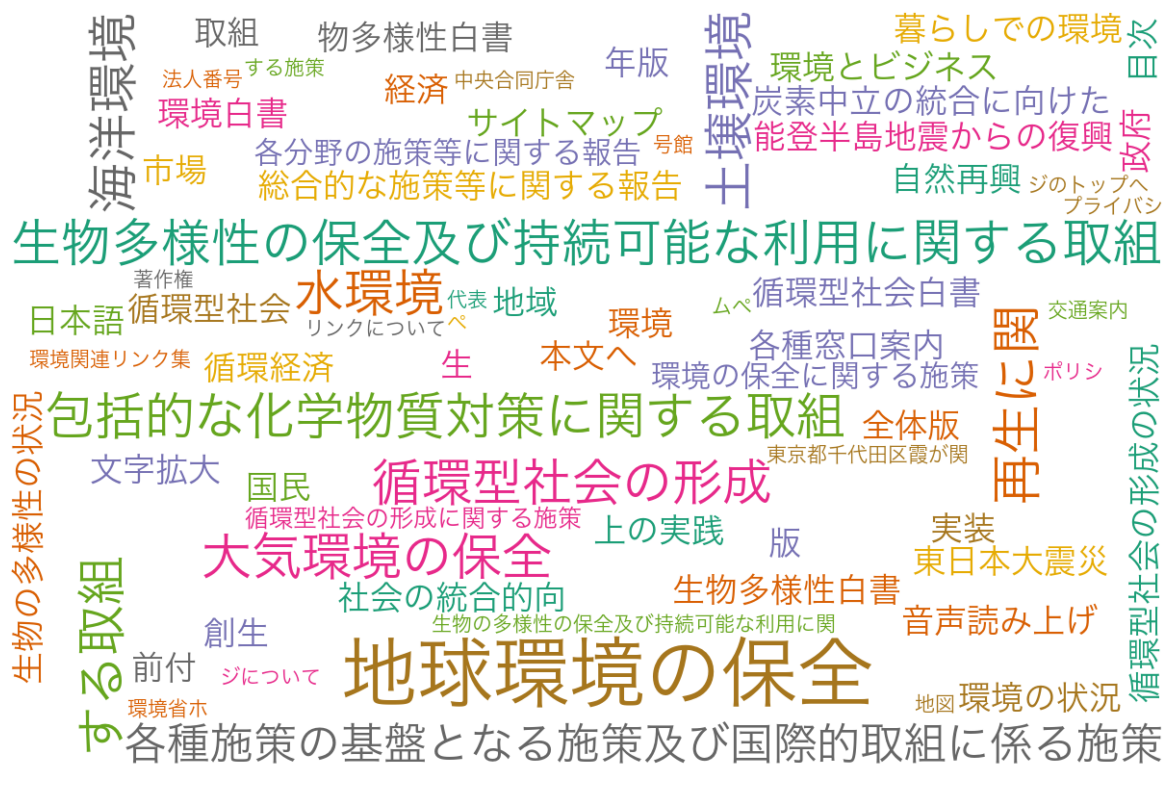

In [ ]:
import fitz
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

pdf_path = "../../src/report.pdf"
doc = fitz.open(pdf_path)

all_text = ""
for page in doc:
    all_text += page.get_text()

pattern = re.compile(r"[ぁ-んァ-ン一-龥]+")
words = pattern.findall(all_text)

manual_exclude = {
    "令和", "第", "年度", "章", "環境省", "省", "部", "分割版"
}

filtered_words = [word for word in words if word not in manual_exclude]
counter = Counter(filtered_words)


print("Top words:", counter.most_common(10))

font_path = "/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc"

wordcloud = WordCloud(
    font_path=font_path,
    width=1200,
    height=800,
    background_color="white",
    colormap="Dark2"
).generate_from_frequencies(counter)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()